In [1]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.layers.normalization import BatchNormalization

print("Loaded all libraries")

Loaded all libraries


In [2]:
import keras,os
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import matplotlib.pyplot as plt

In [3]:
fpath = r"F:\thesis dataset\new dataset for proposemodel/"
random_seed = 42  
# reproduce the data given by a pseudo-random number generator

categories = os.listdir(fpath)
categories = categories[:2]
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['clean', 'dirty'] 

No. of categories =  2


In [4]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            img_array = Image.fromarray(img, 'RGB')
            
            #resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
            resized_img = img_array.resize((227, 227))
            
            img_lst.append(np.array(resized_img))
            
            labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  1440 
No. of labels loaded =  1440
<class 'list'> <class 'list'>


In [5]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (1440, 227, 227, 3) 
Labels shape =  (1440,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


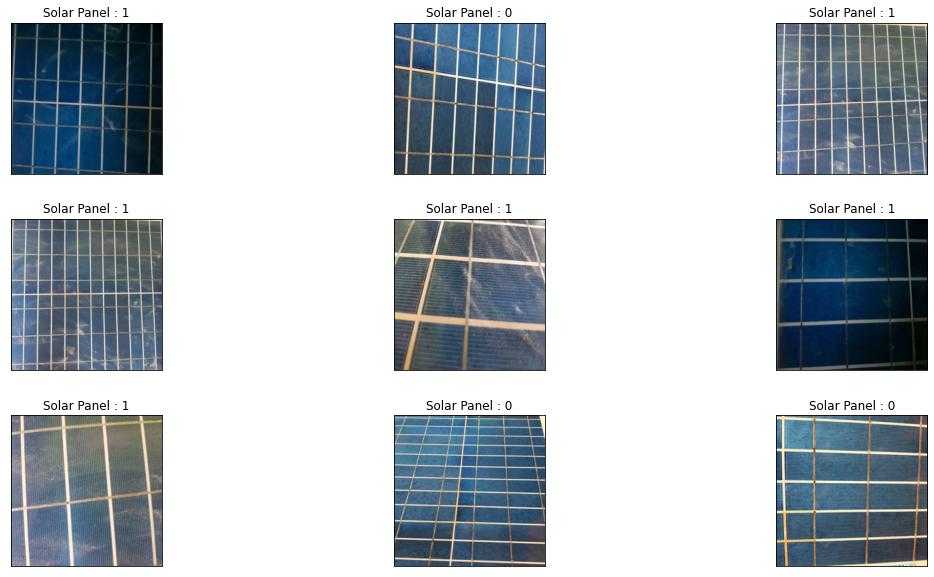

In [6]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Solar Panel : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

In [7]:
#1-step in data shuffling

#get equally spaced numbers in a given range
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [   0    1    2 ... 1437 1438 1439]

'n' values after shuffling =  [ 168  605  548 ... 1294  860 1126]


In [8]:
#2-step in data shuffling

#shuffle images and corresponding labels data in both the lists
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (1440, 227, 227, 3) 
Labels shape after shuffling =  (1440,)


In [9]:
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (1440, 227, 227, 3)


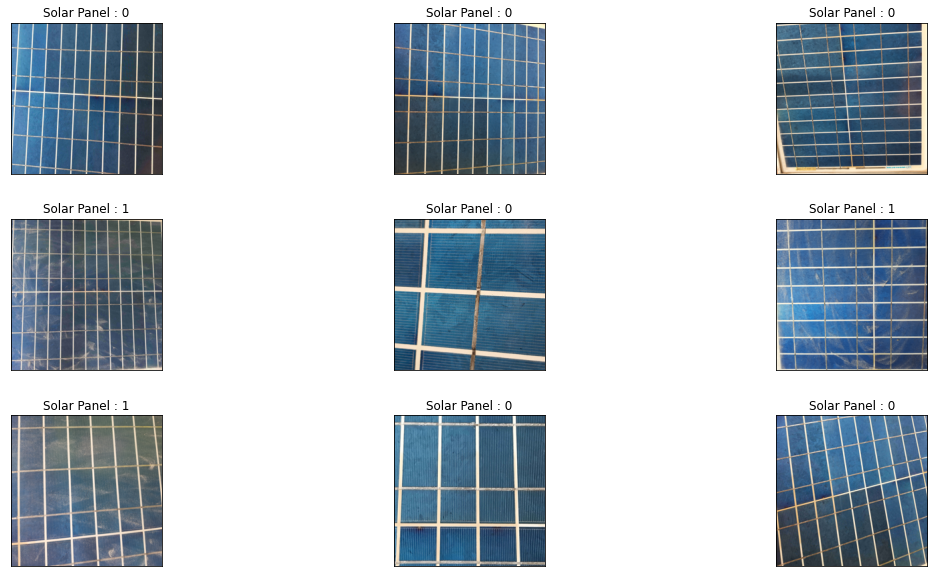

In [10]:
display_rand_images(images, labels)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = random_seed)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (1008, 227, 227, 3)
y_train shape =  (1008,)

x_test shape =  (432, 227, 227, 3)
y_test shape =  (432,)


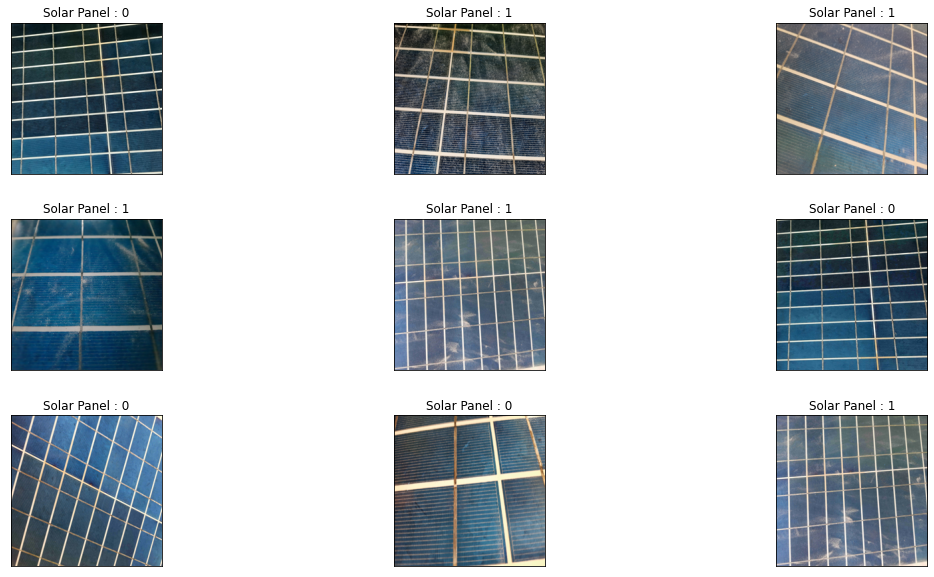

In [12]:
display_rand_images(x_train, y_train)

In [13]:
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=64,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=128,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#3 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
model.add(Conv2D(filters=512,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())

#1 dense layer
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#2 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#3 dense layer
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#output layer
model.add(Dense(20,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 64)        23296     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 128)       204928    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 128)       512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 256)         2

In [14]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [15]:
%%time
history=model.fit(x_train, y_train, epochs=30)

Epoch 1/30
32/32 [==============================] - 29s 916ms/step - loss: 1.6677 - accuracy: 0.7083
Epoch 2/30
32/32 [==============================] - 27s 845ms/step - loss: 0.6409 - accuracy: 0.8323
Epoch 3/30
32/32 [==============================] - 28s 861ms/step - loss: 0.5402 - accuracy: 0.8681
Epoch 4/30
32/32 [==============================] - 29s 914ms/step - loss: 0.4095 - accuracy: 0.8462
Epoch 5/30
32/32 [==============================] - 28s 882ms/step - loss: 0.2906 - accuracy: 0.8998
Epoch 6/30
32/32 [==============================] - 28s 875ms/step - loss: 0.3436 - accuracy: 0.8968
Epoch 7/30
32/32 [==============================] - 27s 852ms/step - loss: 0.3863 - accuracy: 0.8770
Epoch 8/30
32/32 [==============================] - 29s 892ms/step - loss: 0.2518 - accuracy: 0.9038
Epoch 9/30
32/32 [==============================] - 29s 908ms/step - loss: 0.2835 - accuracy: 0.9038
Epoch 10/30
32/32 [==============================] - 29s 895ms/step - loss: 0.2481 - accura

In [16]:
p=loss, accuracy = model.evaluate(x_test, y_test)

print(loss,accuracy)

14/14 [==============================] - 2s 170ms/step - loss: 2.8910 - accuracy: 0.2894
2.8910181522369385 0.28935185074806213


In [17]:
pred = model.predict(x_test)

pred.shape

(432, 20)

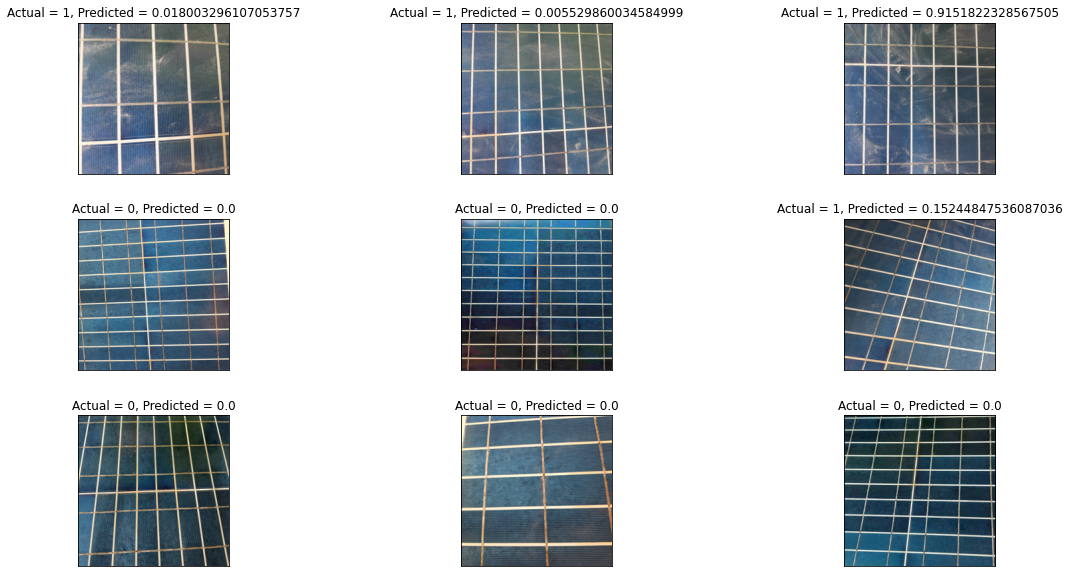

In [18]:
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, x_test.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(x_test[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , y_test[r[0]]*pred[r[0]][y_test[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()

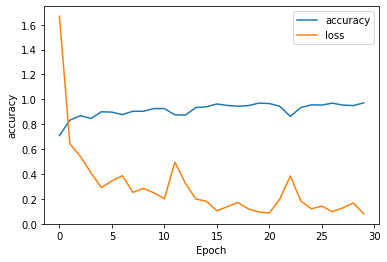

<Figure size 432x288 with 0 Axes>

In [19]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['loss'],label='loss')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

No handles with labels found to put in legend.


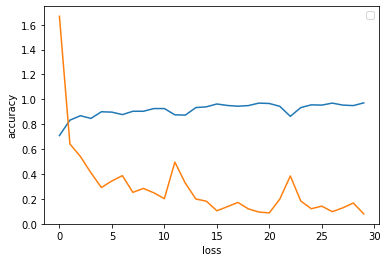

<Figure size 432x288 with 0 Axes>

In [20]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.ylabel('accuracy')
plt.xlabel('loss')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
plt.plot(history.history['p'])
plt.plot(history.history['loss'])
plt.ylabel('test acc')
plt.xlabel('val acc')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

KeyError: 'p'